<a href="https://colab.research.google.com/github/panditrahulsharma/Blood-Cell-Subtypes-Classification-Using-deep-learning-and-CNN-model/blob/master/Blood_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM

White blood cell (WBCs) counting is an important indicator of health and is important for many blood-based diseases diagnostic tests. Currently, doctors utilize expensive automated counters like flow cytometers, or manually count blood cells on a microscope slide. Therefore, providing an automated way to detect and count WBCs would be advantageous. Detecting the WBC's and its subtypes is the first step for achieving this goal.


# CONTENT
For this problem we have dataset containing 12,500 augmented images of blood cells (JPEG) with accompanying cell type labels (CSV). There are approximately 3,000 images for each of 4 different cell types grouped into 4 different folders (according to cell type). The cell types are Eosinophil, Lymphocyte, Monocyte, and Neutrophil. This dataset is accompanied by an additional dataset containing the original 410 images (pre-augmentation) as well as two additional subtype labels (WBC vs WBC) and also bounding boxes for each cell in each of these 410 images (JPEG + XML metadata). More specifically, the folder 'dataset-master' contains 410 images of blood cells with subtype labels and bounding boxes (JPEG + XML), while the folder 'dataset2-master' contains 2,500 augmented images as well as 4 additional subtype labels (JPEG + CSV). There are approximately 3,000 augmented images for each class of the 4 classes as compared to 88, 33, 21, and 207 images of each in folder 'dataset-master'.

#link
#https://www.kaggle.com/paultimothymooney/blood-cells

#                                         INTRODUCTION

**Medical Image Analysis** is a widely used method to screen and diagnose diseases. Depending of the part or tissue of the body would check, we can subset imaging Technics into 2 big methods. First the methods that use rays, like x-ray, Nuclear Magnetic Resonance (NMR). In general, the images generated by these methods are as a photographic film (black and white). The advantage of these methods is that we can observe body through tissues and have access to internal parts without chirurgy. The inconvenient is that these methods uses ionizing radiation (dangerous for health) and mainly expensive. There are at less two kaggle competition with this type of images: NIH Chest X-rays and Chest X-Ray Images (Pneumonia) The second kind of medical imaging is applied to all type of tissues or physiological fluid (plasma, blood). The samples are prepared on glass slide and stained with Hematoxylin and eosin stain (H&E). This technique is very old and widely used for several medical screening and diagnostics. H&E staining is not expensive but needs Human intervention and the processing takes a while. The interpretation of the images also needs multiple experts (pathologist) to visualize and diagnose slides mainly through microscopes. the analysis remains subjective and could differ between pathologists.
On the other hand, the H&E stains are routinely prepared by technicians who become overwhelmed by the increasing number of samples. Likewise, pathologists are over-worked by the microscopic observation and interpretation, causing overflow that may result in diagnostic error.

**Motivation**

A computational grading of slides using deep learning techniques may help to make a pre-screening of hundreds or thousands of slides before Human verification.


# What is Blood?
Blood is essential to life. Blood circulates through our body and delivers essential substances like oxygen and nutrients to the body’s cells. It also transports metabolic waste products away from those same cells. There is no substitute for blood. It cannot be made or manufactured. Generous blood donors are the only source of blood for patients in need of a blood transfusion.

# Blood Components :

There are four basic components that comprise human blood: plasma, red blood cells, white blood cells and platelets.
![](https://www.oneblood.org/_resources/images/content/blood-components.jpg)

# Red Blood Cells

Red blood cells represent 40%-45% of your blood volume. They are generated from your bone marrow at a rate of four to five billion per hour. They have a lifecycle of about 120 days in the body.

# Platelets

Platelets are an amazing part of your blood. Platelets are the smallest of our blood cells and literally look like small plates in their non-active form. Platelets control bleeding. Wherever a wound occurs, the blood vessel will send out a signal. Platelets receive that signal and travel to the area and transform into their “active” formation, growing long tentacles to make contact with the vessel and form clusters to plug the wound until it heals.

# Plasma

Plasma is the liquid portion of your blood. Plasma is yellowish in color and is made up mostly of water, but it also contains proteins, sugars, hormones and salts. It transports water and nutrients to your body’s tissues.

![](https://github.com/Shenggan/BCCD_Dataset/raw/master/example.jpg)




# What Are White Blood Cells?

Your blood is made up of red blood cells, white blood cells, platelets, and plasma.

Your white blood cells account for only about 1% of your blood, but their impact is big. White blood cells are also called leukocytes. They protect you against illness and disease.

Think of white blood cells as your immunity cells. In a sense, they are always at war. They flow through your bloodstream to fight viruses, bacteria, and other foreign invaders that threaten your health. When your body is in distress and a particular area is under attack, white blood cells rush in to help destroy the harmful substance and prevent illness.

White blood cells are made in the bone marrow. They are stored in your blood and lymph tissues. Because some white blood cells have a short life of 1 to 3 days, your bone marrow is always making them.

# Types of white blood cells :



1-   Monocytes - They have a longer lifespan than many white blood cells and help to break down bacteria.

2-    Lymphocytes - They create antibodies to fight against bacteria, viruses, and other potentially harmful invaders.

3-    Neutrophils - They kill and digest bacteria and fungi. They are the most numerous type of white blood cell and your first line of defense when infection strikes.

4-    Basophils - These small cells seem to sound an alarm when infectious agents invade your blood. They secrete chemicals such as histamine, a marker of allergic disease, that help control the body's immune response.

5-    Eosinophils - They attack and kill parasites and cancer cells, and help with allergic responses.


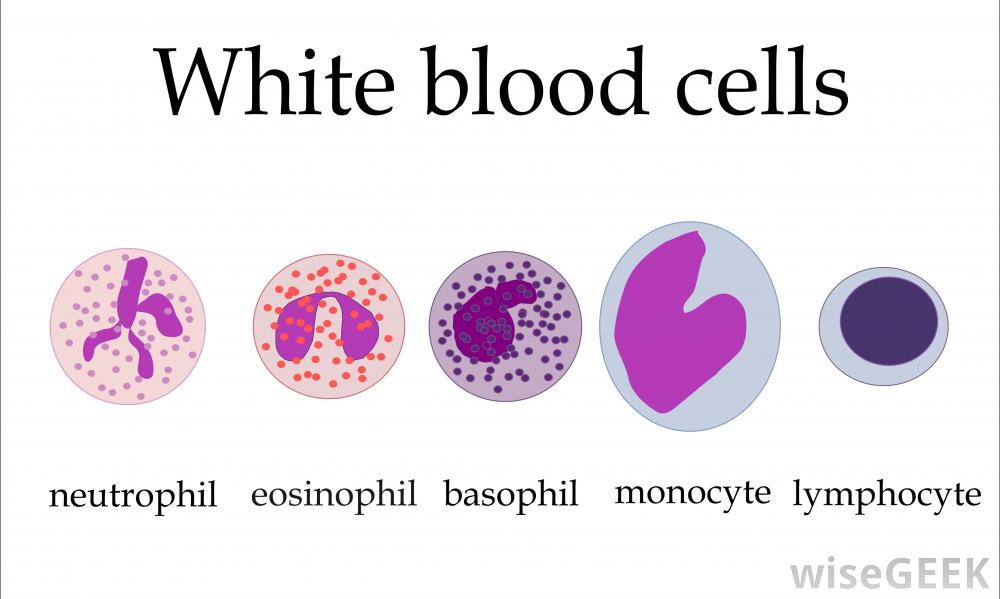

In [8]:
from IPython.display import Image
Image(filename="/home/kartik/Desktop/cell_images/wbc.jpg", width=500, height=400)

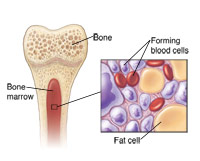

In [18]:
Image(filename="/home/kartik/Desktop/cell_images/bone marrow.jpeg", width=300, height=300)

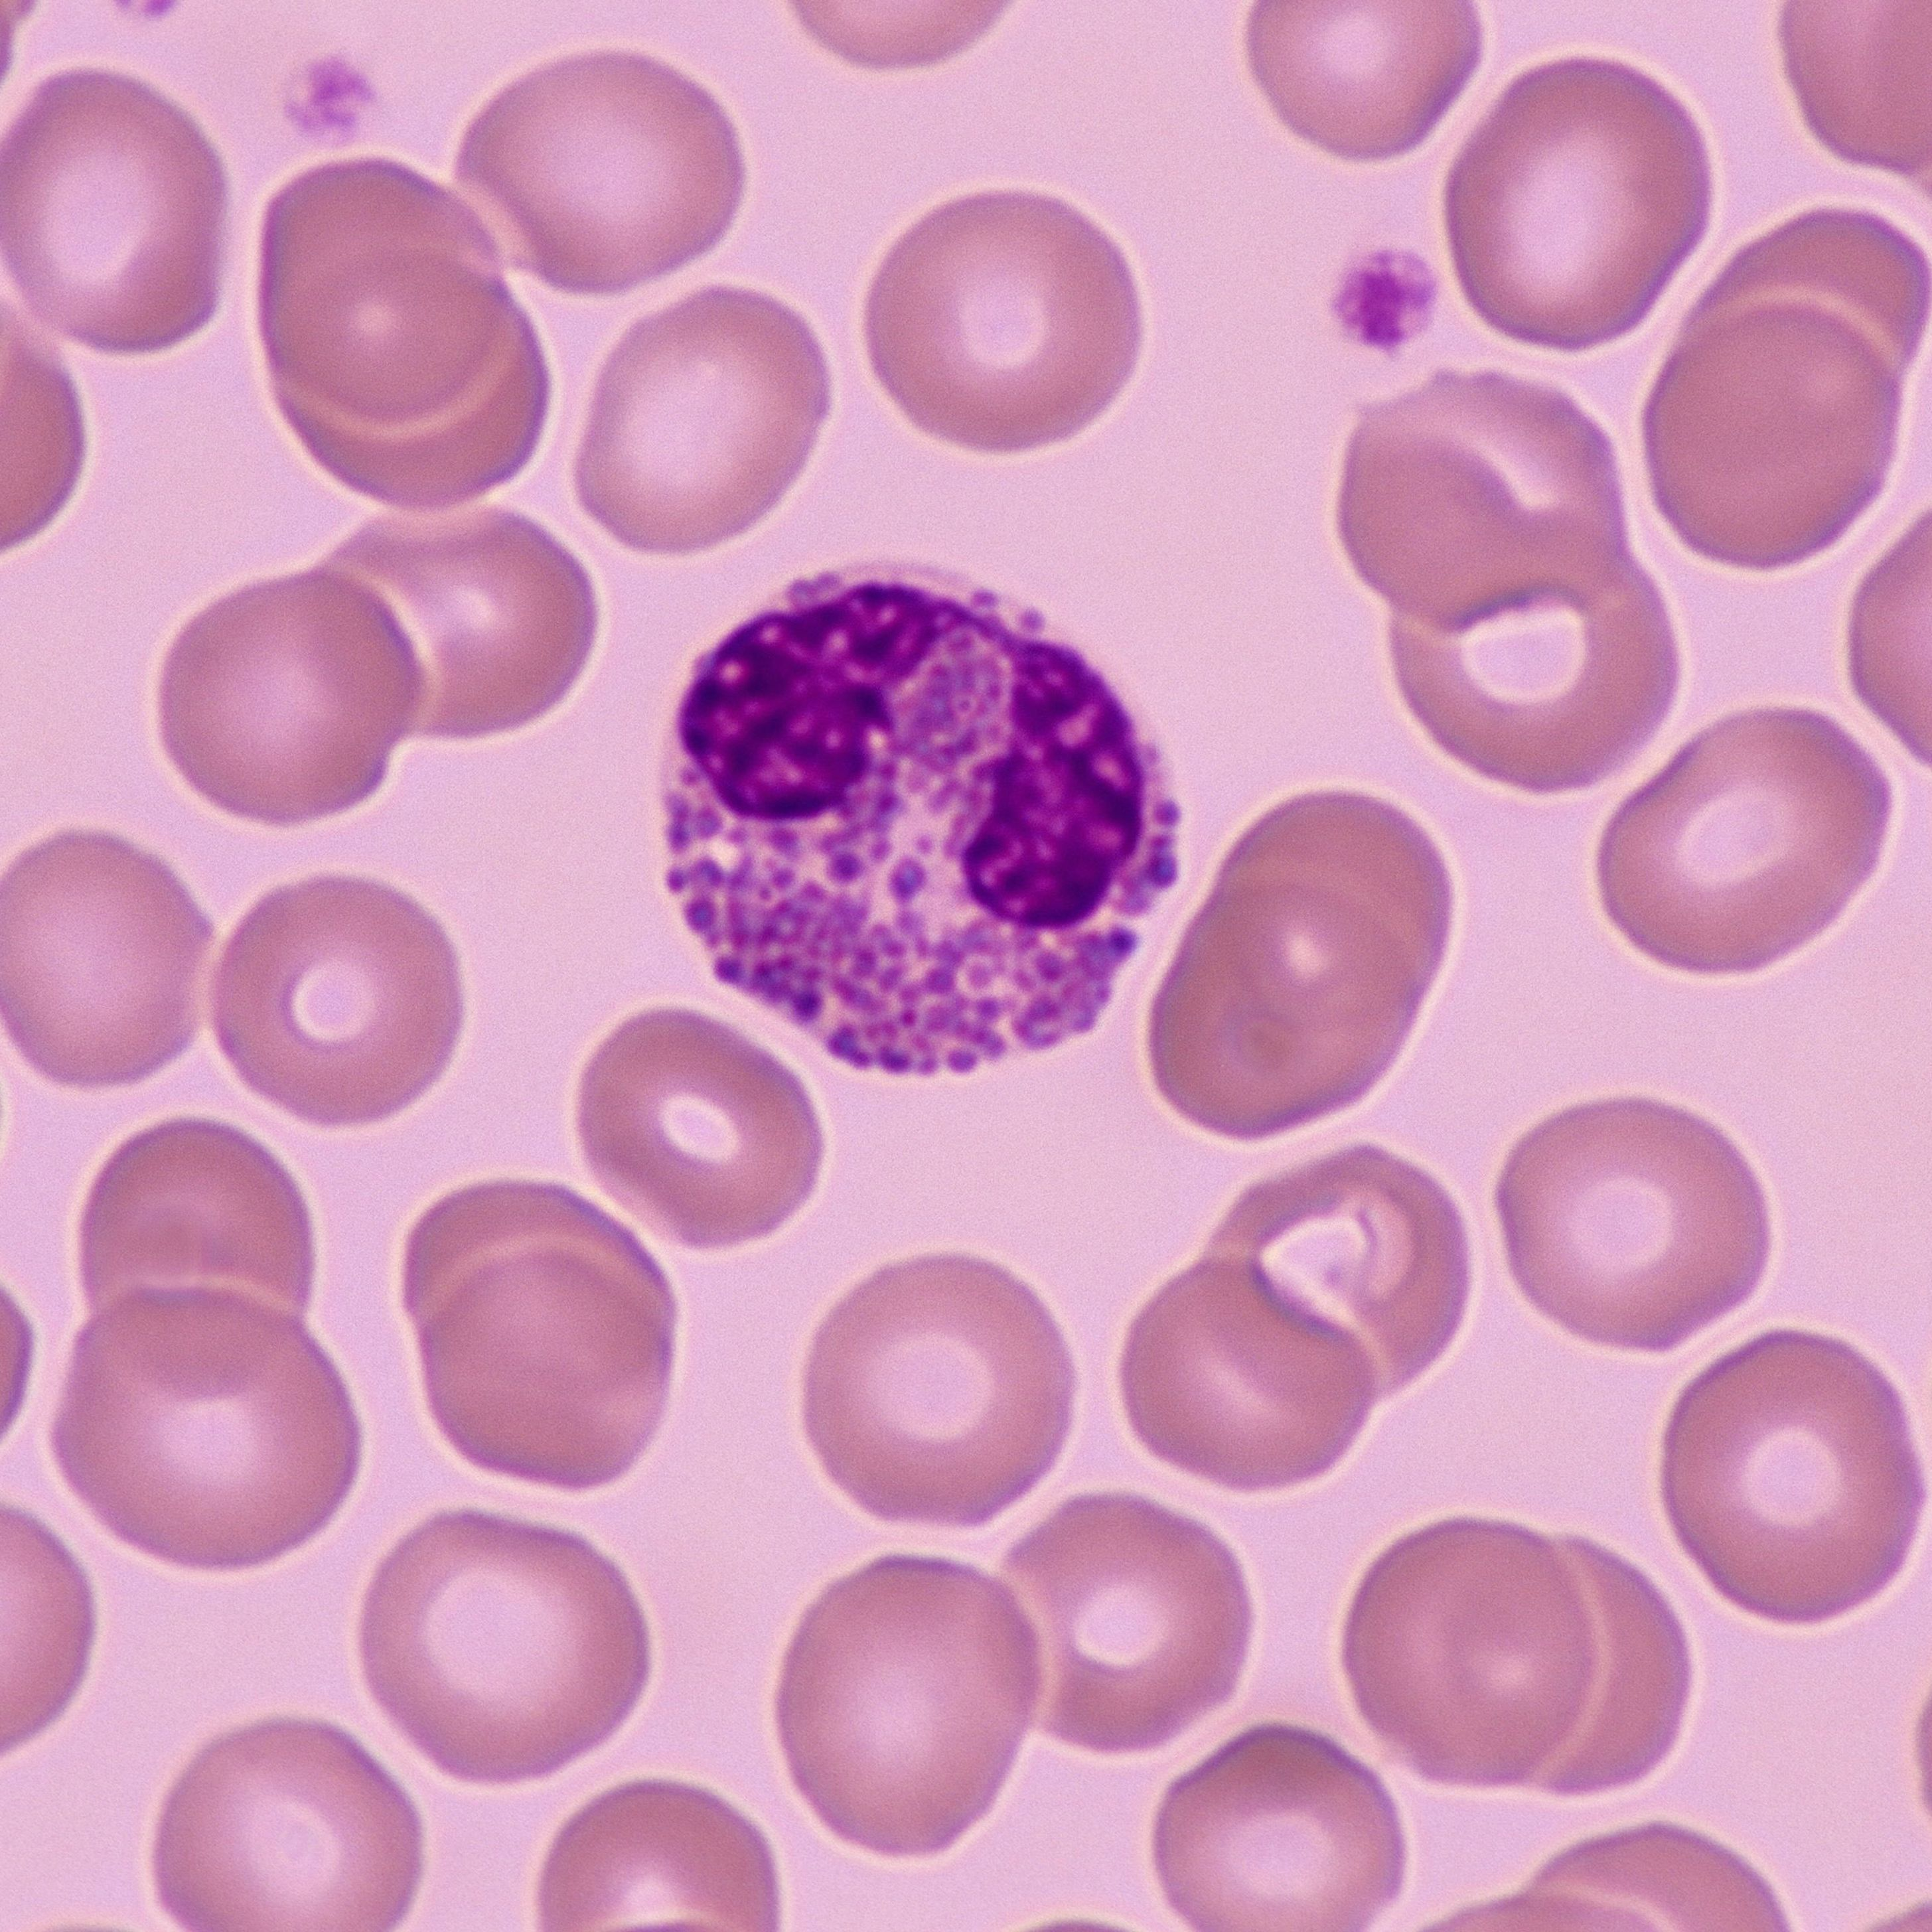

In [42]:
Image(filename="/home/kartik/Desktop/cell_images/eosi.jpg", width=300, height=500)


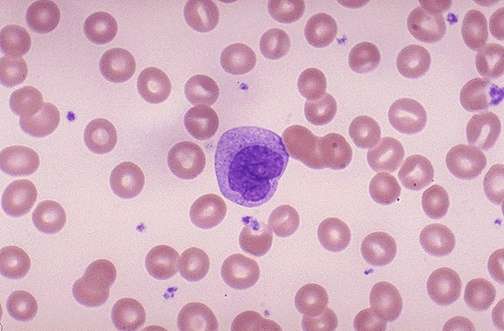

In [40]:
Image(filename="/home/kartik/Desktop/cell_images/monocyte.jpg", width=400, height=300)

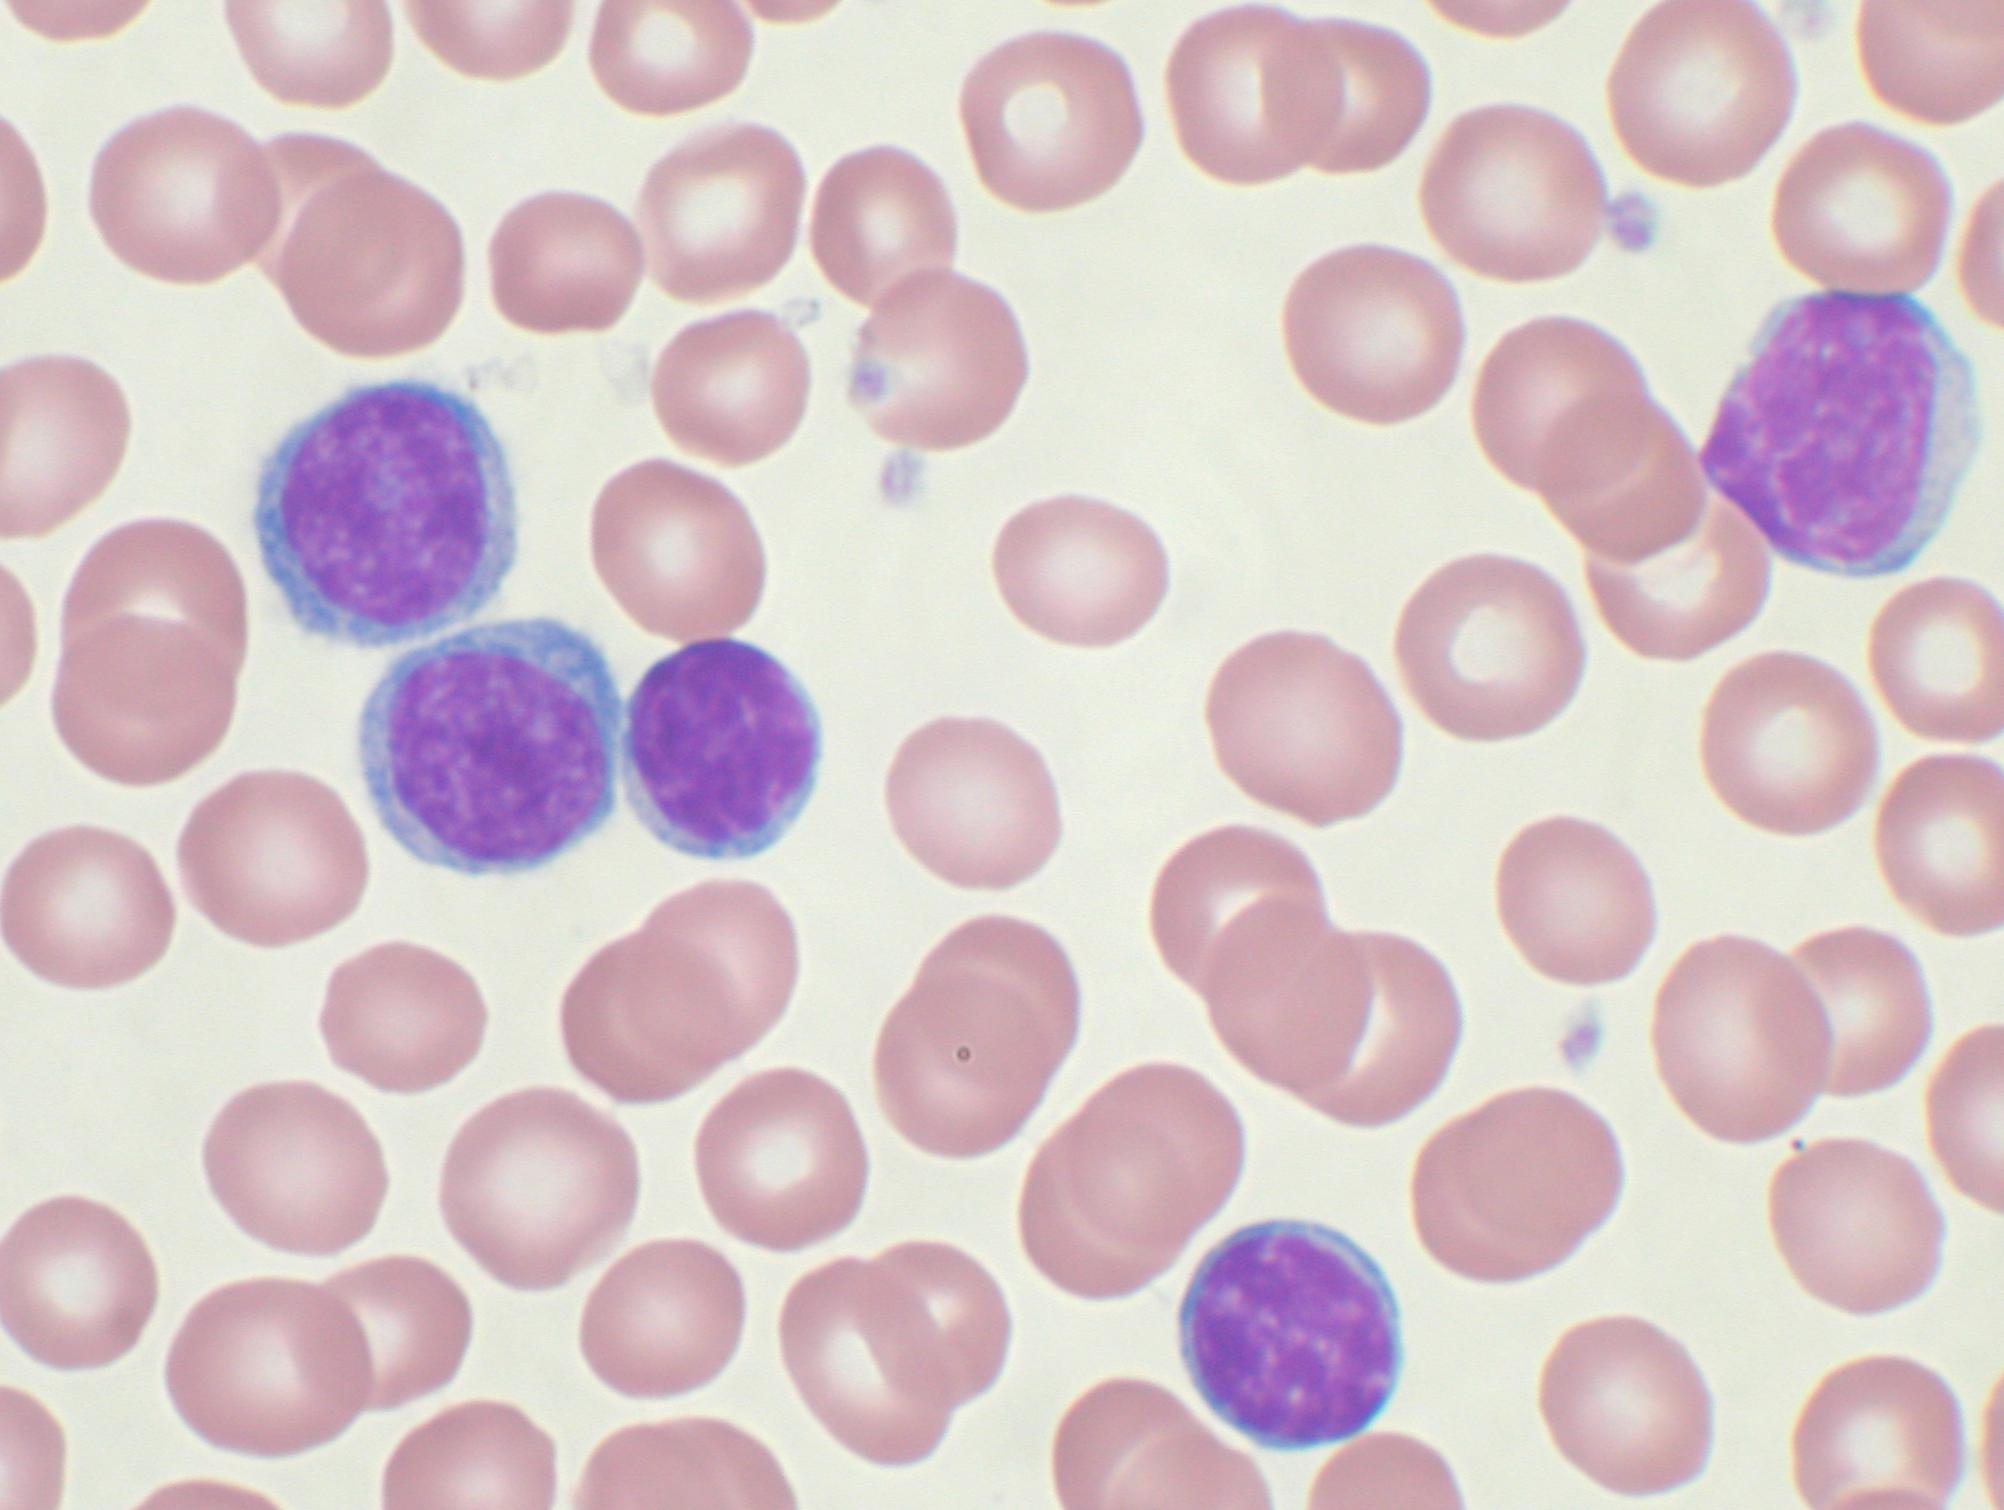

In [51]:
Image(filename="/home/kartik/Desktop/cell_images/lymphocyte.jpg", width=400, height=300)

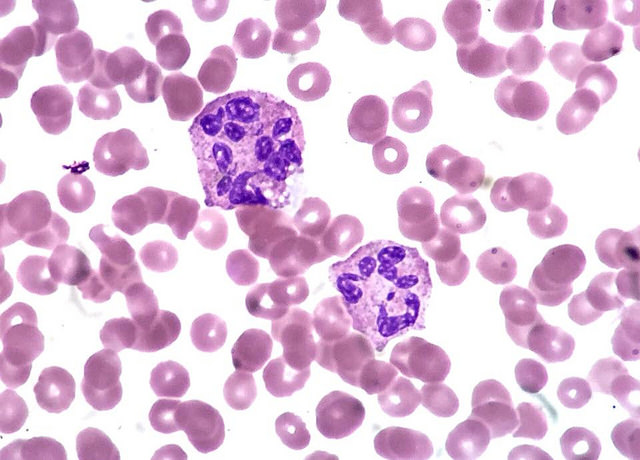

In [52]:
Image(filename="/home/kartik/Desktop/cell_images/neutrophil.jpg", width=400, height=300)

# 1.Import Library and Mount Drive

In [1]:
import numpy as np
import math, cv2, os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


In [2]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)


In [3]:
train_dataset_path="TRAIN/"  
test_dataset_path="TEST/"    
in_dir='dataset2-master/dataset2-master/images/' 
CATEGORIES    = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL'] 

# 2.Plotting images using opencv

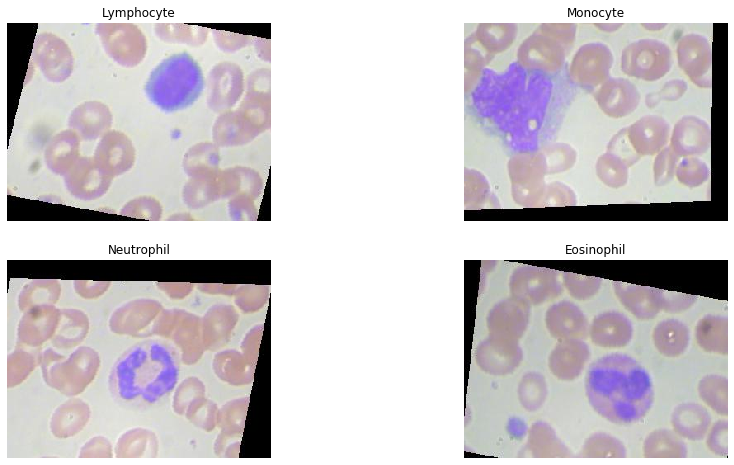

In [5]:
# Plot Image
def plotImage(image_path):  
    image = cv2.imread(image_path) 
    image = image[:, :, [2, 1, 0]]  
    image=image.astype('float32') / 255 
    plt.imshow(image)  
    return

plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Lymphocyte'); plt.axis('off'); plotImage(os.path.join(in_dir, 'TRAIN/LYMPHOCYTE/_0_204.jpeg'))
plt.subplot(222)
plt.title('Monocyte'); plt.axis('off'); plotImage(os.path.join(in_dir, 'TRAIN/MONOCYTE/_0_9309.jpeg'))
plt.subplot(223)
plt.title('Neutrophil'); plt.axis('off'); plotImage(os.path.join(in_dir, 'TRAIN/NEUTROPHIL/_0_9742.jpeg'))
plt.subplot(224)
plt.title('Eosinophil'); plt.axis('off'); plotImage(os.path.join(in_dir, 'TRAIN/EOSINOPHIL/_5_907.jpeg'))

# 3.Summary of training and test samples.


In [7]:
print('Training samples:')
train_dir = os.path.join(in_dir, "TRAIN")  
num_samples = 0  
for cell in os.listdir(train_dir):
    num_cells = len(os.listdir(os.path.join(train_dir, cell))) 
    num_samples += num_cells
    print('Cell: {:15s}  num samples: {:d}'.format(cell, num_cells))
print('Total training samples: {:d}\n'.format(num_samples)) 

#for testing data
print("testing samples")
num_samples=0
test_dir = os.path.join(in_dir, "TEST")
for cell in os.listdir(test_dir):
  num_cells=len(os.listdir(os.path.join(test_dir,cell)))
  num_samples+=num_cells
  print("cell:{:15s} num samples : {:d}".format(cell,num_cells))
print("total testing sample: {:d}\n".format(num_samples))  

Training samples:
Cell: EOSINOPHIL       num samples: 2497
Cell: LYMPHOCYTE       num samples: 2483
Cell: MONOCYTE         num samples: 2478
Cell: NEUTROPHIL       num samples: 2499
Total training samples: 9957

testing samples
cell:EOSINOPHIL      num samples : 623
cell:LYMPHOCYTE      num samples : 620
cell:MONOCYTE        num samples : 620
cell:NEUTROPHIL      num samples : 624
total testing sample: 2487



# 4.Image preprocessing

In [8]:

train_datagen = ImageDataGenerator(rescale = 1./255) 

#if we have less features data and we want to create more dataset for training purpose
#so karas gives a method that we can do rescale,shaear_range,zoom_range,and horizontal and more.....


In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [10]:



training_set = train_datagen.flow_from_directory(in_dir+train_dataset_path,  
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 color_mode='rgb', 
                                                 shuffle=True, 
                                                 seed=None, 
                                                 class_mode = 'categorical') 


Found 9957 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory(in_dir+test_dataset_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            color_mode='rgb',
                                            shuffle=True,
                                            seed=None,
                                            class_mode = 'categorical')

Found 2487 images belonging to 4 classes.


# 5.Building the CNN Model


In [12]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution

classifier.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape = (64, 64, 3), activation = 'relu'))


# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20)) 

# Adding Third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20)) #randomly droping out 20% of the weights of this layer 

# Step 3 - Flattening
classifier.add(Flatten())


# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.



# Compiling the CNN Model

In [13]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. It should typically be equal to the number of unique samples of your dataset divided by the batch size.

then
steps_per_epoch=10,000//32


---

So, theorethycally each epoch yields:

steps_per_epoch = TotalTrainingSamples / TrainingBatchSize<br>
validation_steps = TotalvalidationSamples / ValidationBatchSize


# Part 2. Fitting the CNN model to Images

In [14]:
history=classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps =100)


Epoch 1/20
100/100 [==============================] - 149s 1s/step - loss: 1.3890 - accuracy: 0.2372 - val_loss: 1.3917 - val_accuracy: 0.2485
Epoch 2/20
100/100 [==============================] - 90s 900ms/step - loss: 1.3863 - accuracy: 0.2569 - val_loss: 1.3906 - val_accuracy: 0.2532
Epoch 3/20
100/100 [==============================] - 87s 866ms/step - loss: 1.3873 - accuracy: 0.2480 - val_loss: 1.3829 - val_accuracy: 0.2498
Epoch 4/20
100/100 [==============================] - 31s 314ms/step - loss: 1.3866 - accuracy: 0.2359 - val_loss: 1.3878 - val_accuracy: 0.2552
Epoch 5/20
100/100 [==============================] - 28s 281ms/step - loss: 1.3865 - accuracy: 0.2490 - val_loss: 1.3857 - val_accuracy: 0.2510
Epoch 6/20
100/100 [==============================] - 29s 294ms/step - loss: 1.3866 - accuracy: 0.2400 - val_loss: 1.3851 - val_accuracy: 0.2513
Epoch 7/20
100/100 [==============================] - 34s 335ms/step - loss: 1.3865 - accuracy: 0.2506 - val_loss: 1.3834 - val_acc

In [15]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


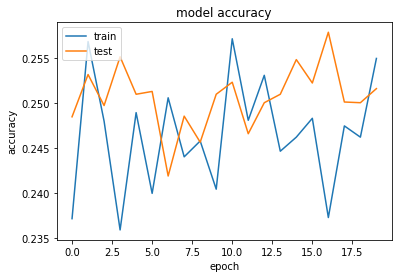

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
                                                 
plt.show() # to show the plot

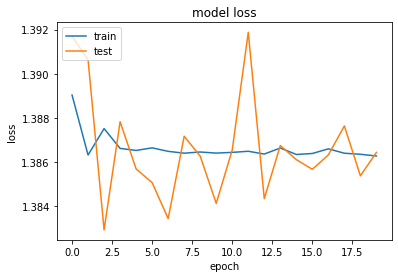

In [17]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 
                                                 
plt.show() # to show the plot


In [18]:

#this code makes pickle file
import pickle
filename = 'Blood_cell.pkl'
model_pkl = open(filename, 'wb') 
pickle.dump(classifier, model_pkl)
# Close the pickle instances
model_pkl.close()   


# Part 3 - Making new predictions

In [19]:

import pickle
digit_detect_pkl=open('Blood_cell.pkl','rb') #opening our pickle file of model in "rb" i.e. "rb" mode opens the file in binary format for reading.
model = pickle.load(digit_detect_pkl) #loading our pickle object using .load method of pickle."""

In [ ]:
"""#import library-- If loaded pickle in another file
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.compat.v1 as tf
from keras.models import load_model
"""

In [62]:
"""
 If loaded pickle in another file
in_dir='/content/drive/My Drive/blood_cell/dataset2-master/dataset2-master/images/'
train_dataset_path=in_dir+"TRAIN/"
test_dataset_path=in_dir+"TEST/"
CATEGORIES    = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']

"""

'\n If loaded pickle in another file\nin_dir=\'/content/drive/My Drive/blood_cell/dataset2-master/dataset2-master/images/\'\ntrain_dataset_path=in_dir+"TRAIN/"\ntest_dataset_path=in_dir+"TEST/"\nCATEGORIES    = [\'EOSINOPHIL\',\'LYMPHOCYTE\',\'MONOCYTE\',\'NEUTROPHIL\']\n\n'

In [ ]:
"""
 If loaded pickle in another file
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_dataset_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            color_mode='rgb',
                                            class_mode = 'categorical')
"""

In [20]:
y_pred = model.predict_generator(test_set) 
y_pred=y_pred.argmax(axis=-1) 

In [21]:
y_true = test_set.classes 


In [22]:
y_true

array([0, 0, 0, ..., 3, 3, 3])

# Classification metrics

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score #importing confusion_matrix and accuracy_score from sklearn.metrics


In [24]:
cm=confusion_matrix(y_true,y_pred) #confusion matrix takes 2 arguments i.e. actual and predicted values
print(cm)

[[  0   0   0 623]
 [  0   0   0 620]
 [  0   0   0 620]
 [  0   0   0 624]]


In [25]:
print(accuracy_score(y_true,y_pred)) #accuracy_score takes 2 arguments i.e. actual and predicted values

0.25090470446320867


# SUMMARY 

Our aim was to develop a deep learning model to identify four different types of White Blood cells found in humans that are Eosinophils , Monocytes , Lymphocytes and Neutrophils. Primary approach towards this problem was to develop a Convolutional Neural Network model that can classify blood smear slides into four categories mentioned above.Deep learning framework which we used for this problem was Keras.We used ImageDataGenerator class of Keras to load images directly from directory and for Image Preprocessing purposes like Rescaling.OpenCV was used to display the images and have a better intuition about the problem.A 14 layer deep CNN was implemented in which we used Dropout layers for regularization purpose to prevent overfitting.as being a multiclass classification problem we used softmax activation function in the last Dense layer followed by categorical_crossentropy as loss function and accuracy as classification metrics. 

